In [ ]:
import pandas as pd
# Load the dataset
df = pd.read_csv("grocery_data_with_dates.csv")

# Split items for each transaction into a list
df['Items'] = df['Items'].apply(lambda x: x.split(", "))

# Use one-hot encoding to transform the data into a transaction matrix
basket = df['Items'].str.join('|').str.get_dummies()

# Display the first few rows to verify the transformation
print(basket.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   Apples  Biscuit  Bread  Butter  Coffee  Eggs  Jam  Milk  Oranges
0       0        0      0       0       1     1    0     1        0
1       0        1      1       0       0     0    0     0        1
2       0        0      0       0       1     1    1     0        0
3       1        0      0       0       1     0    1     0        0
4       0        0      0       0       1     0    0     1        1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install flask-ngrok

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate frequent itemsets with a minimum support threshold
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Display the first few frequent itemsets
print(frequent_itemsets.head())


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


   support   itemsets
0  0.39278   (Apples)
1  0.39046  (Biscuit)
2  0.39104    (Bread)
3  0.39018   (Butter)
4  0.38992   (Coffee)


In [ ]:
pip install mlxtend --upgrade

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Generate association rules with a minimum confidence threshold

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05, num_itemsets=len(frequent_itemsets))

# Display the first few rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


  antecedents consequents  support  confidence      lift
0    (Apples)   (Biscuit)  0.12530    0.319008  0.817006
1   (Biscuit)    (Apples)  0.12530    0.320904  0.817006
2    (Apples)     (Bread)  0.12864    0.327512  0.837540
3     (Bread)    (Apples)  0.12864    0.328969  0.837540
4    (Apples)    (Butter)  0.12638    0.321758  0.824639


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Display top rules based on lift or confidence for analysis
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by="lift", ascending=False).head(10))



   antecedents consequents  support  confidence      lift
25       (Jam)   (Biscuit)  0.12652    0.328914  0.842375
24   (Biscuit)       (Jam)  0.12652    0.324028  0.842375
2     (Apples)     (Bread)  0.12864    0.327512  0.837540
3      (Bread)    (Apples)  0.12864    0.328969  0.837540
58    (Coffee)   (Oranges)  0.12640    0.324169  0.835918
59   (Oranges)    (Coffee)  0.12640    0.325941  0.835918
50   (Oranges)    (Butter)  0.12642    0.325993  0.835493
51    (Butter)   (Oranges)  0.12642    0.324004  0.835493
8     (Apples)      (Eggs)  0.12834    0.326748  0.834946
9       (Eggs)    (Apples)  0.12834    0.327950  0.834946


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


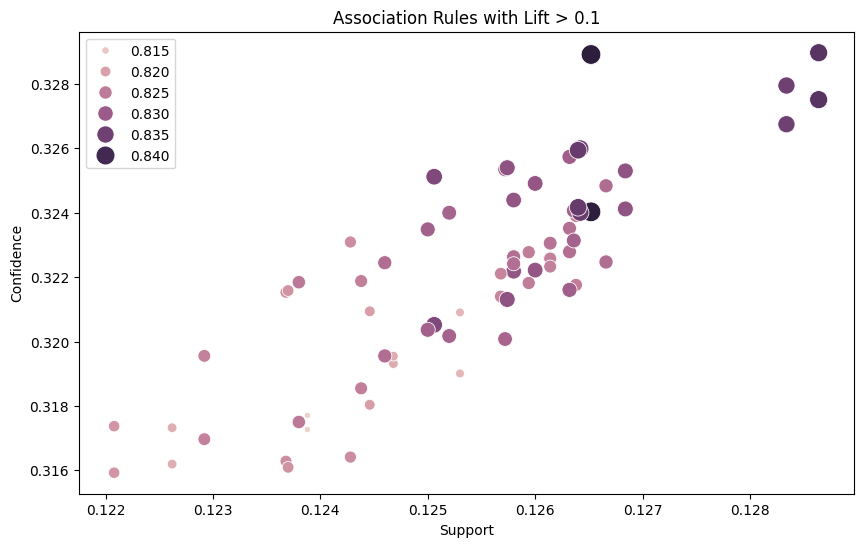

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the association rules with lift > 1
high_lift_rules = rules[rules['lift'] > 0.5]

# Plot the rules based on lift and confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=high_lift_rules, sizes=(20, 200))
plt.title('Association Rules with Lift > 0.1')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend()
plt.show()


In [ ]:
def suggest_pre_cart_for_customer(customer_history, current_items):
    recommended_items = set()

    # Loop through customer's past purchases (customer_history is a list of items they've bought before)
    for item in customer_history:
        relevant_rules = rules[rules['antecedents'].apply(lambda x: item in x)]

        for consequent in relevant_rules[relevant_rules['confidence'] > 0.5]['consequents']:
            recommended_items.update(consequent)

    # Suggest pre-cart items based on current items (items customer is adding to the cart)
    for item in current_items:
        relevant_rules = rules[rules['antecedents'].apply(lambda x: item in x)]

        for consequent in relevant_rules[relevant_rules['confidence'] > 0.3]['consequents']:
            recommended_items.update(consequent)

    # Exclude items already in the current cart
    return list(recommended_items - set(customer_history) - set(current_items))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Sample customer's purchase history
customer_history = ["Eggs", "Butter", "Jam"]

# Sample current cart (items the customer is buying)
sample_cart = ["Milk", "Bread"]

# Get pre-cart items for the customer
pre_cart = suggest_pre_cart_for_customer(customer_history, sample_cart)

print("Personalized pre-cart items:", pre_cart)


Personalized pre-cart items: ['Oranges', 'Apples', 'Biscuit', 'Coffee']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def recommend_coupons(transaction):
    recommended_items = set()
    for item in transaction:
        # Get rules where the item is in the antecedent
        relevant_rules = rules[rules['antecedents'].apply(lambda x: item in x)]
        # Add consequents of those rules to recommendations if confidence is high
        for consequent in relevant_rules[relevant_rules['confidence'] > 0.3]['consequents']:
            recommended_items.update(consequent)
    # Exclude items already in the transaction
    return recommended_items - set(transaction)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Sample transaction
sample_transaction = ["Milk", "Bread"]
print("Recommended coupons on:", recommend_coupons(sample_transaction))


Recommended coupons on: {'Eggs', 'Apples', 'Biscuit', 'Jam', 'Coffee', 'Oranges', 'Butter'}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import random
import pandas as pd
from datetime import datetime, timedelta

# Define a list of sample grocery items
grocery_items = ["Milk", "Bread", "Eggs", "Butter", "Apples", "Coffee", "Biscuit", "Jam", "Oranges"]

# Define the number of transactions
num_transactions = 100



# Function to generate discount coupon based on item combinations
def generate_discount_coupon(customer_id, cart_items):
    # Find rules for the items in the cart
    applicable_rules = []

    for item in cart_items:
        relevant_rules = rules[rules['antecedents'].apply(lambda x: item in x)]

        for _, rule in relevant_rules.iterrows():
            # Calculate the discount based on confidence or lift
            if rule['confidence'] >= 0.3:
                applicable_rules.append(rule)

    # If we have applicable rules, we can offer a discount
    if applicable_rules:
        max_rule = max(applicable_rules, key=lambda x: x['confidence'])  # Pick the rule with the highest confidence
        discount_percentage = min(60, max_rule['confidence'] * 60)  # Example: maximum 60% discount
        return discount_percentage

    return 0  # No discount if no applicable rule

# Example customer purchase
customer_id = "Customer_1"
sample_cart = ["Milk", "Bread","coffee"]

# Generate a discount for the customer based on the cart
discount = generate_discount_coupon(customer_id, sample_cart)
print(f"Discount for {customer_id}: {discount}%")

# Now, apply this discount to the cart value (example calculation)
cart_value = 2000
  # Example cart value
discounted_value = cart_value * (1 - discount / 100)
print(f"Original Cart Value: {cart_value}, Discounted Value: {discounted_value}")


Discount for Customer_1: 19.73813420621931%
Original Cart Value: 2000, Discounted Value: 1605.2373158756138


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
